# Basic Feature Engineering

---

Before diving into complex data types such as text and image, let’s start with the simplest: numeric data. 

Numeric data is already in a format that’s easily ingestible by mathematical models. This doesn’t mean that feature engineering is no longer necessary, though. Good features should not only represent salient aspects of the data, but also conform to the assumptions of the model. Hence, transformations are often necessary. Numeric feature engineering techniques are fundamental. They can be applied whenever raw data is converted into numeric features.



The first sanity check for numeric data is whether the **magnitude** matters. Do we just need to know whether it’s positive or negative? Or perhaps we only need to know the magnitude at a very coarse granularity? This sanity check is particularly important for automatically accrued numbers such as counts: the number of daily visits to a website, the number of reviews garnered by a restaurant, etc.



Next, consider the **scale** of the features. 

What are the largest and the smallest values? Do they span several orders of magnitude? 

Models that are smooth functions of input features are sensitive to the scale of the input. For example, $3x + 1$ is a simple linear function of the input $x$, and the scale of its output depends directly on the scale of the input. Other examples include k-means clustering, nearest neighbors methods, and anything that uses the Euclidean distance. For these models and modeling components, it is often a good idea to normalize the features so that the output stays on an expected scale.


Logical functions, on the other hand, are not sensitive to input feature scale. Their output is binary no matter what the inputs are. 

For instance, the logical AND takes any two variables and outputs 1 if and only if both of the inputs are true. Another example of a logical function is the step function (e.g., is $x > 5$?). Decision tree models consist of step functions of input features. Hence, models based on space-partitioning trees (e.g., decision trees) are not sensitive to scale. 

The only exception is if the scale of the input grows over time, which is the case if the feature is an accumulated count of some sort—eventually it will grow outside of the range that the tree was trained on. If this might be the case, then it might be necessary to rescale the inputs periodically.

It’s also important to consider the **distribution** of numeric features. 

Distribution summarizes the probability of taking on a particular value. The distribution of input features matters to some models more than others. 

For instance, the training process of a linear regression model assumes that prediction errors are distributed like a Gaussian. This is usually fine, except when the prediction target spreads out over several orders of magnitude. In this case, the Gaussian error assumption likely no longer holds. One way to deal with this is to transform the output target in order to tame the magnitude of the growth. (Strictly speaking this would be target engineering, not feature engineering.) 

Log transforms, which are a type of *power transform*, take the distribution of the variable closer to Gaussian.

## Dealing with Counts

In the age of Big Data, counts can quickly accumulate without bound. 

When data can be produced at high volume and velocity, it’s very likely to contain a few extreme values. It is a good idea to check the scale and determine whether to keep the data as raw numbers, convert them into binary values to indicate presence, or bin them into coarser granularity.

### Quantization or Binning

Suppose our task is to use collaborative filtering to predict the rating a user might give to a business. The review count might be a useful input feature because there is usually a strong correlation between popularity and good ratings. Now the question is, should we use the raw review count or process it further?

Raw counts that span several orders of magnitude are problematic for many models. In a linear model, the same linear coefficient would have to work for all possible values of the count. Large counts could also wreak havoc in unsupervised learning methods such as k-means clustering, which uses Euclidean distance as a similarity function to measure the similarity between data points. A large count in one element of the data vector would outweigh the similarity in all other elements, which could throw off the entire similarity measurement.

One solution is to contain the scale by quantizing the count. In other words, we group the counts into bins, and get rid of the actual count values. Quantization maps a continuous number to a discrete one. We can think of the discretized numbers as an ordered sequence of bins that represent a measure of intensity.



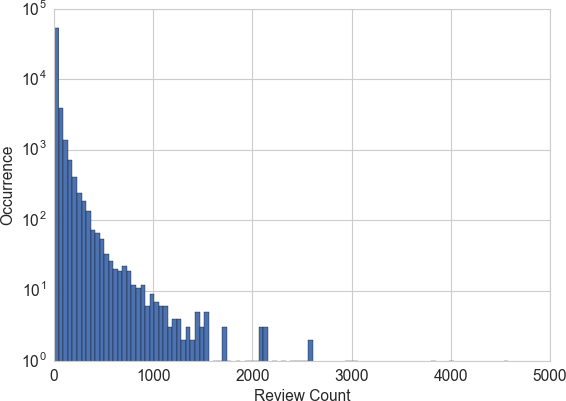

In order to quantize data, we have to decide how wide each bin should be. The solutions fall into two categories: *fixed-width* or *adaptive*. We will give an example of each type.

#### Fixed-width binning

With fixed-width binning, each bin contains a specific numeric range. The ranges can be custom designed or automatically segmented, and they can be linearly scaled or exponentially scaled.


#### Quantile binning

Fixed-width binning is easy to compute. But if there are large gaps in the counts, then there will be many empty bins with no data. This problem can be solved by adaptively positioning the bins based on the distribution of the data. This can be done using the quantiles of the distribution.

Quantiles are values that divide the data into equal portions. For example, the median divides the data in halves; half the data points are smaller and half larger than the median. The quartiles divide the data into quarters, the deciles into tenths, etc.

Deciles of the review counts in the Yelp reviews dataset—both the x- and y-axes are on a log scale

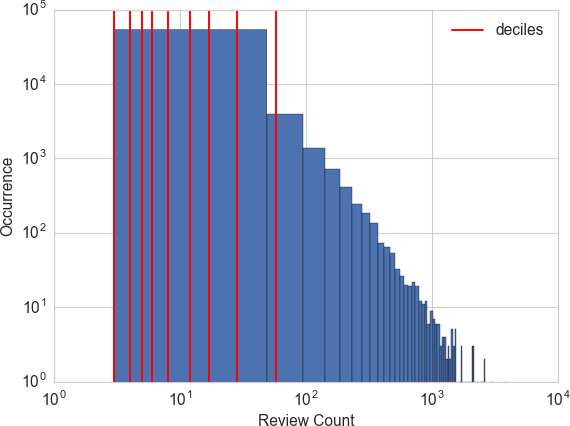

### Log Transformation

The log function is the inverse of the exponential function. In other words, the $log$ function compresses the range of large numbers and expands the range of small numbers. The larger $x$ is, the slower $log(x)$ increments.

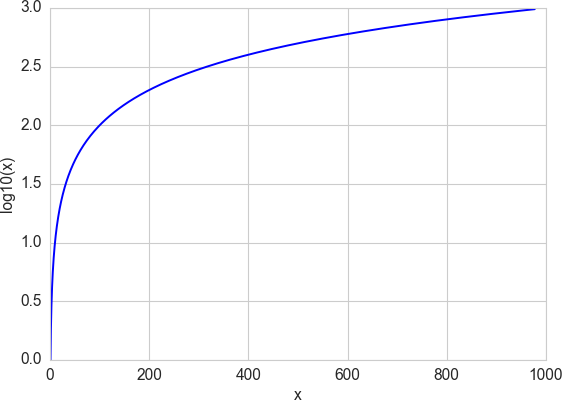

Comparison of review counts before (top) and after (bottom) log transformation

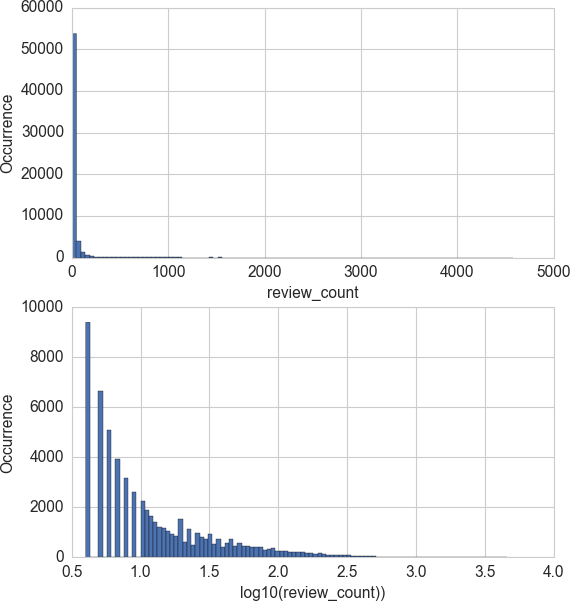

 Histograms of the number of words in the article from the Online News Popularity dataset before and after log transformation.  Notice that the distribution looks much more Gaussian after log transformation, with the exception of the burst of number of articles of length zero (no content).

 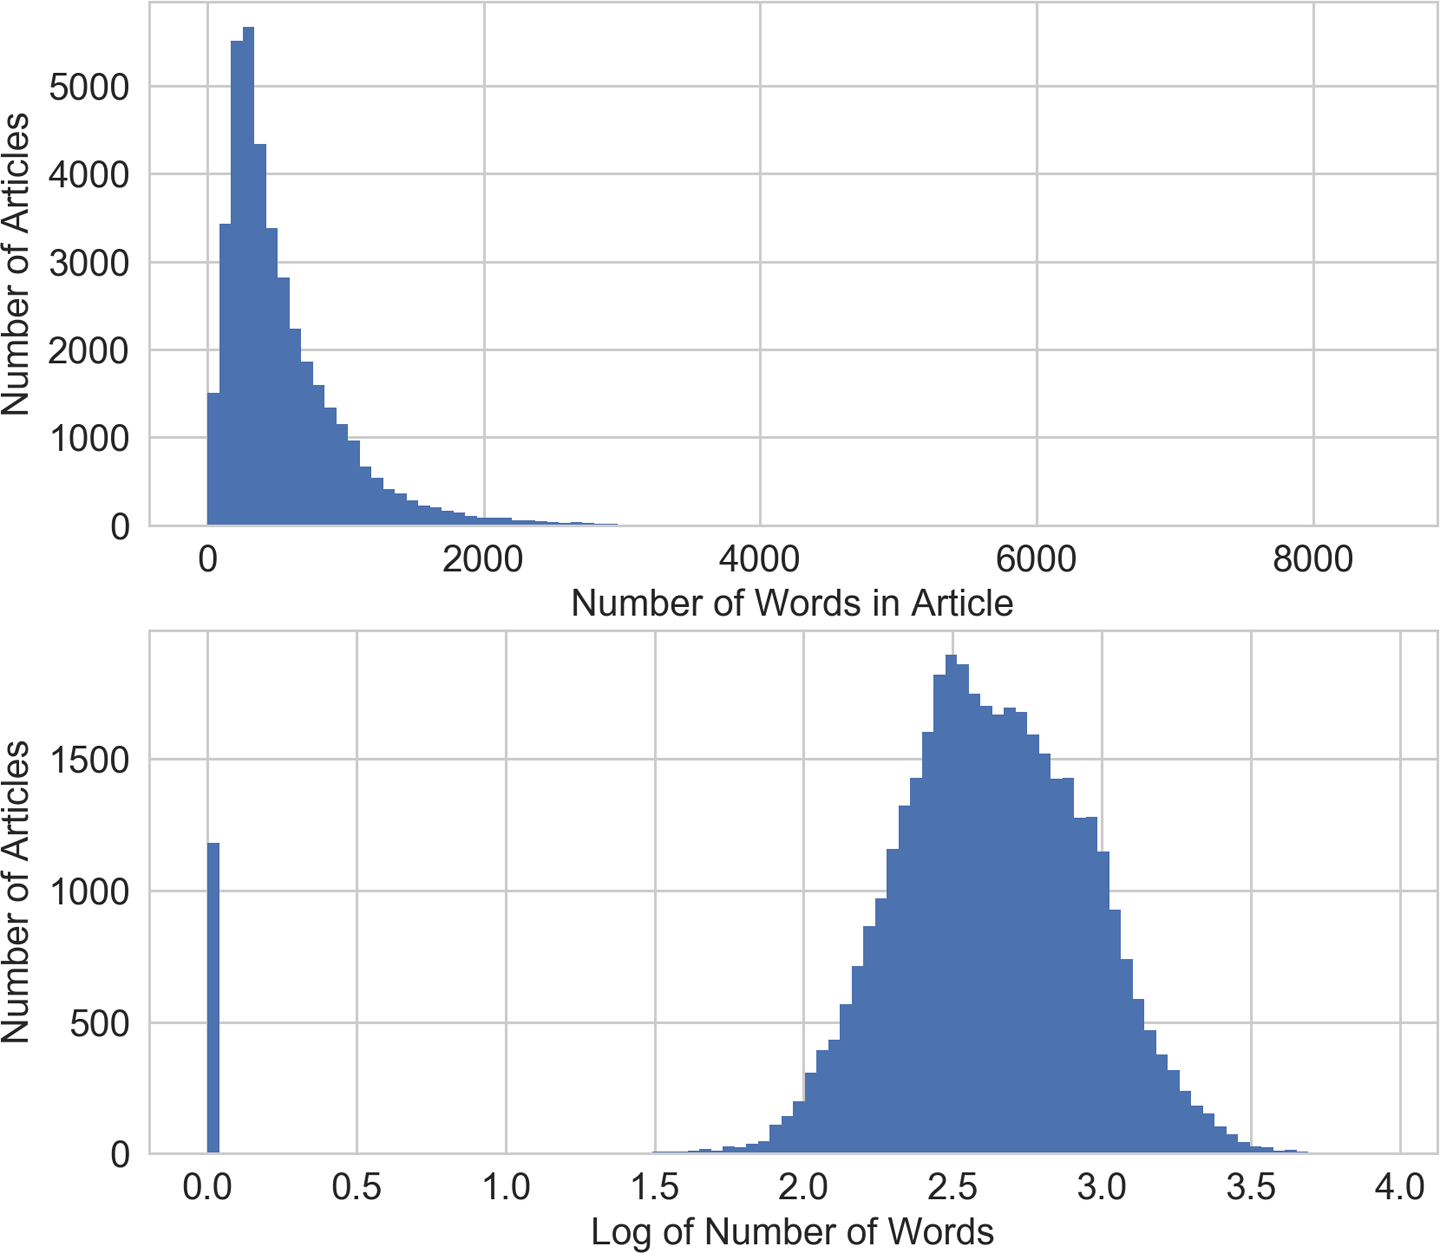

### Power Transforms: Generalization of the Log Transform

The log transform is a specific example of a family of transformations known as power transforms. 
In statistical terms, these are variance-stabilizing transformations. Power transforms change the distribution of the variable so that the variance is no longer dependent on the mean.

A simple generalization of both the square root transform and the log transform is known as the **Box-Cox transform**:



$$ 
X ^ {( \lambda ) } = \left \{
\begin{array}{l}
{ {
\frac{X  ^  \lambda  - 1 } \lambda 
 } \  \textrm{ for  }  \lambda \neq0, } \\
 { { \mathop{\rm log} } X \  \textrm{ for  }  \lambda = 0. } 
\end{array}
 \right .
$$


The formula  $  { {( x  ^  \lambda  - 1 ) } / \lambda } $
is chosen so that  $  x ^ {( \lambda ) } $
is continuous as  $  \lambda $
tends to zero and monotone increasing with respect to  $  x $
for any  $  \lambda $.

The power parameter  $  \lambda $ is estimated by a graphical technique or by the *Maximum-likelihood method*. 

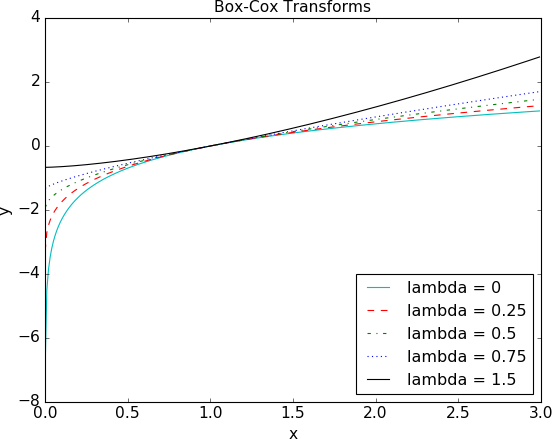

## Feature Scaling or Normalization

Some features are bounded in value while other numeric features, such as counts, may increase without bound. 

Models that are smooth functions of the input, such as linear regression, logistic regression, or anything that involves a matrix, are affected by the scale of the input. 

If your model is sensitive to the scale of input features, feature scaling could help. 

As the name suggests, feature scaling changes the scale of the feature. Sometimes people also call it feature normalization. Feature scaling is usually done individually to each feature.

### Min-Max Scaling

Let $x$ be an individual feature value (i.e., a value of the feature in some data point), and $\min(x)$ and $\max(x)$, respectively, be the minimum and maximum values of this feature over the entire dataset. *Min-max scaling* squeezes (or stretches) all feature values to be within the range of [0, 1]. 

$$
\tilde x  = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

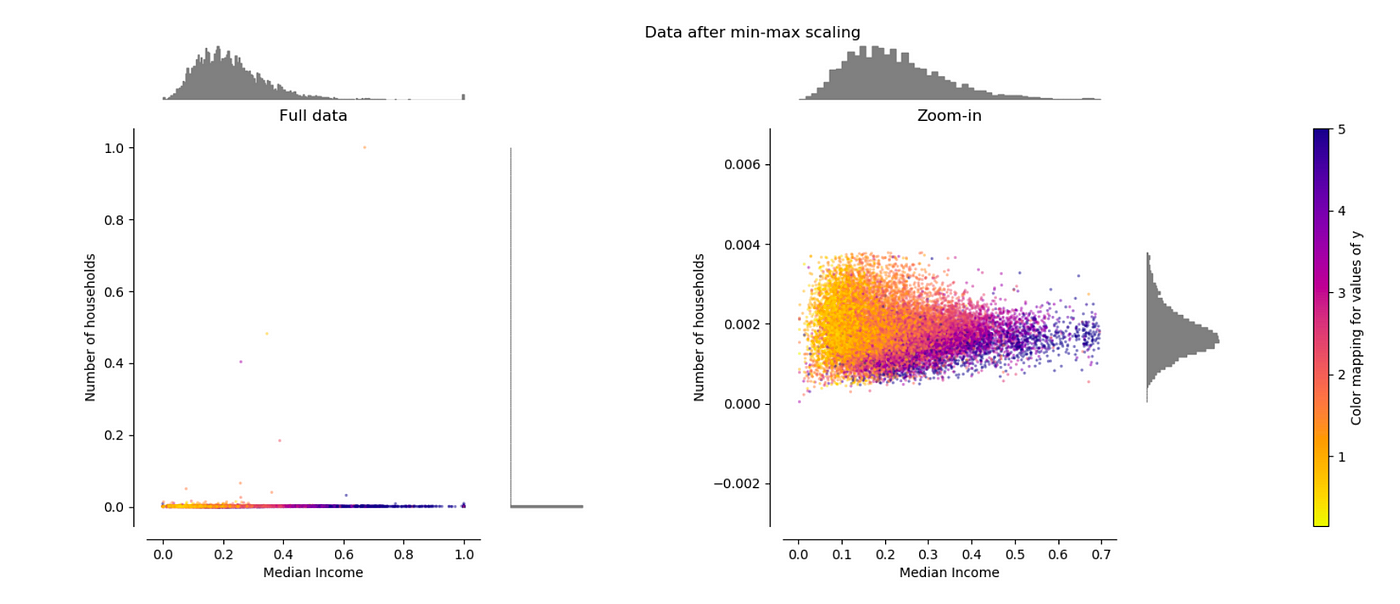

### Variance Scaling (Standardization)

It subtracts off the mean of the feature (over all data points) and divides by the variance. Hence, it can also be called variance scaling. The resulting scaled feature has a mean of 0 and a variance of 1. If the original feature has a Gaussian distribution, then the scaled feature does too.

$$
\tilde x  = \frac{x - \bar x}{\hat \sigma_x}
$$

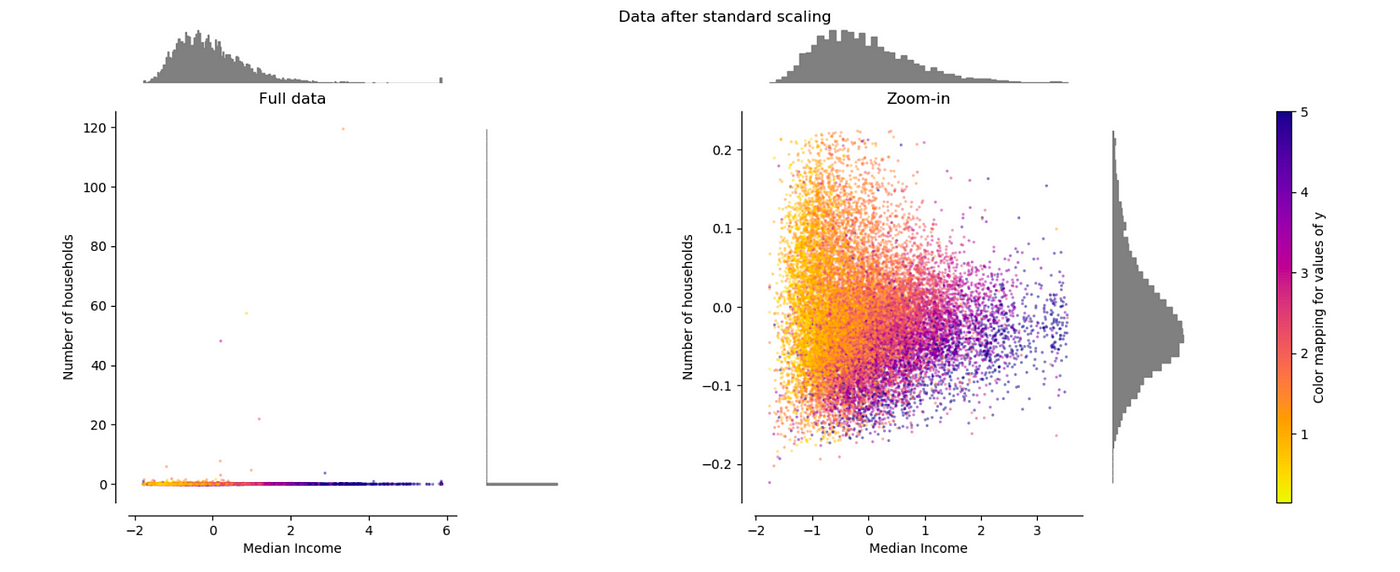


>WARNING: DON’T “CENTER” SPARSE DATA!
>
>Use caution when performing min-max scaling and standardization on sparse features. Both subtract a quantity from the original feature value. 
>If the shift is not zero, then these two transforms can turn a sparse feature vector where most values are zero into a dense one. This in turn could create a huge computational burden for the classifier, depending on how it is implemented.

### $L_2$ Normalization

This technique normalizes (divides) the original feature value by what’s known as the $L_2$ norm, also known as the Euclidean norm. This measures the length of the vector in coordinate space  and it’s defined as follows:

$$
\tilde x = \frac{x}{||x||_2}
$$

where

$$
||x||_2 =  \sqrt{x^2_1 + x^2_2 + \dots + x^2_m}
$$

 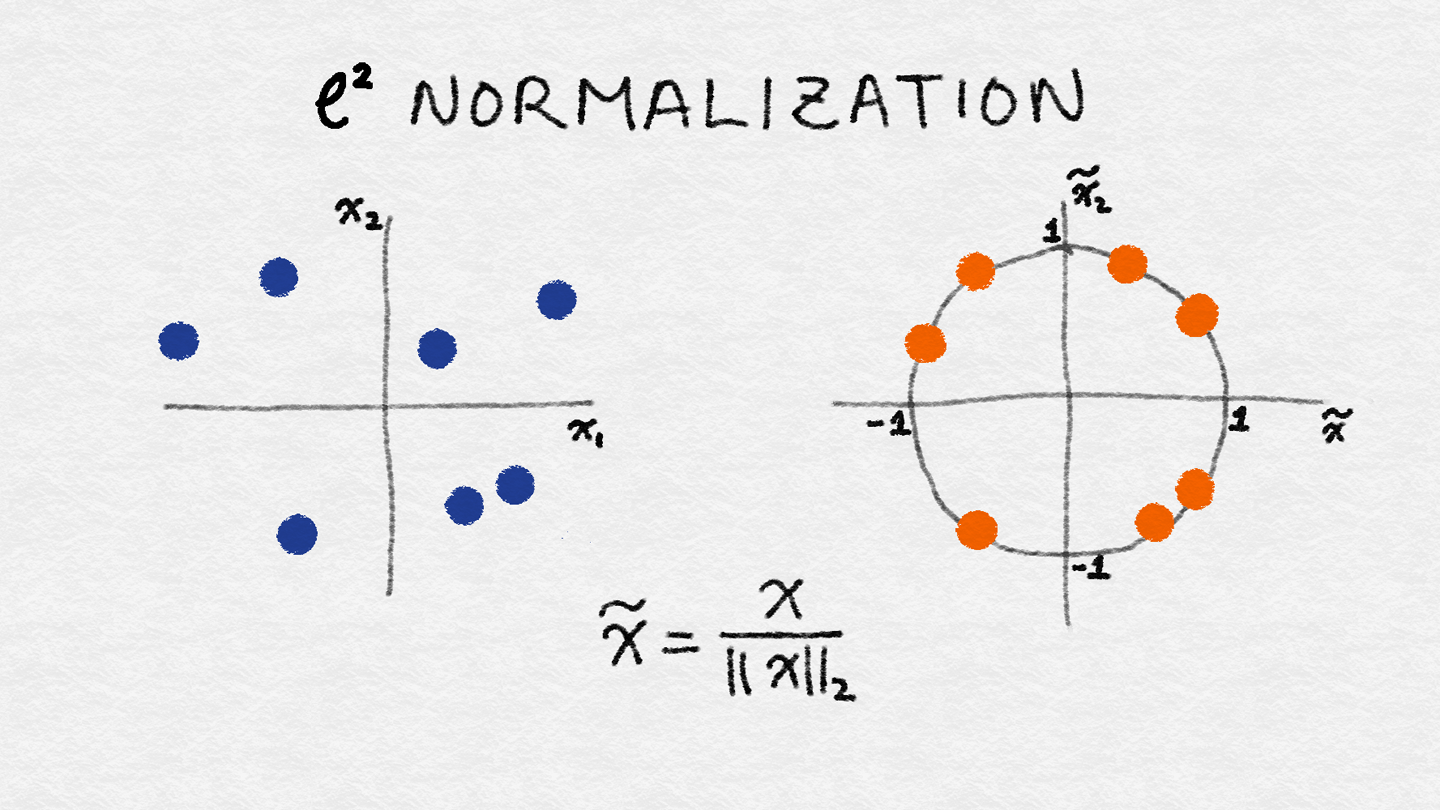


## Feature Selection

Feature selection techniques prune away nonuseful features in order to reduce the complexity of the resulting model. 
>Given a set of $d$ features, select a subset of size $m$ that leads to the smallest classification error.


The end goal is a parsimonious model that is quicker to compute, with little or no degradation in predictive accuracy. In order to arrive at such a model, some feature selection techniques require training more than one candidate model. In other words, feature selection is not about reducing training time—in fact, some techniques increase overall training time—but about reducing model scoring time.


Once $m$ has been decided (rule of thumb $N_{class}/m>10$) choose the $m$ most informative features keeping:
- Large distances between classes
- Small distances within class

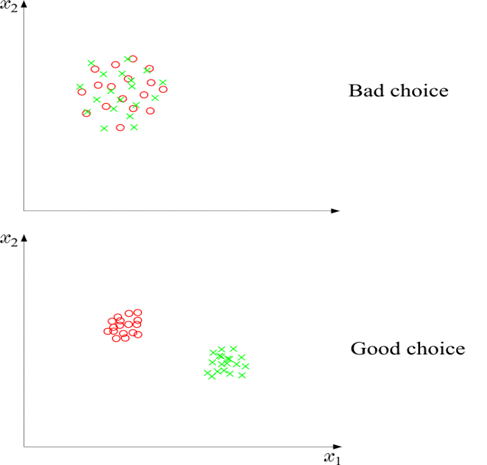

Roughly speaking, feature selection techniques fall into four classes:

- Filtering
- Unsupervised methods
- Wrapper methods
- Embedded methods

## The Mobile Price dataset 
 1. The data is already tidy and partitioned into training and testing csv files. 
 2. There are 2000 observations in the training set and 1000 in testing.
 3. Each observation consisits of 20 phone features (columns) and one categorical label (final column) describing the phone's price range.

### Data description
| Feature | Description |
| ------- | ----------- |
| battery_power | Total energy a battery can store in one time measured in mAh |
|blue | Has Bluetooth or not |
|clock_speed | the speed at which microprocessor executes instructions |
|dual_sim | Has dual sim support or not |
| fc | Front Camera megapixels |
| four_g | Has 4G or not |
| int_memory | Internal Memory in Gigabytes |
| m_dep | Mobile Depth in cm |
| mobile_wt | Weight of mobile phone |
| n_cores | Number of cores of the processor |
| pc | Primary Camera megapixels |
| px_height | Pixel Resolution Height |
| px_width | Pixel Resolution Width |
| ram | Random Access Memory in MegaBytes |
| sc_h | Screen Height of mobile in cm |
| sc_w | Screen Width of mobile in cm |
| talk_time | the longest time that a single battery charge will last when you are |
| three_g | Has 3G or not |
| touch_screen | Has touch screen or not |
| wifi | Has wifi or not |
| price_range | This is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost). |

## Setup
Let's get all the requirements sorted before we move on to the excercise. Don't worry too much about the models we'll be using or how to train them for now. 

In [1]:
# Globals
seed = 1017

#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tableone import TableOne
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

#magic
%matplotlib inline

## What question am I answering?
Well, we want to demonstrate the utility of feature selection. To this end, we compare predictive power in a model with and without feature selection. So, for every parsimonious model we train let's compare its performance with that of its couterpart prodigious model (i.e. model that uses all the features).

In [2]:
# disable warnings generated by deprecated numpy behaviour
import warnings
warnings.filterwarnings('ignore')

## Loading the data
We should have a look at how the features are distributed grouped by the labels. For this we'll generate a table 1.

In [3]:
# load the data as a pandas dataframe
df = pd.read_csv("Lesson_02_data/train.csv")
df_test = pd.read_csv("Lesson_02_data/test.csv")

# Generate table 1
TableOne(df, groupby=df.columns[-1],
         pval=True,
         dip_test=True,
         normal_test=True,
         tukey_test=True)

Grouped by price_range                                                                                         
                                          Missing          Overall               0               1               2               3 P-Value
n                                                             2000             500             500             500             500        
battery_power, mean (SD)                        0   1238.5 (439.4)  1116.9 (410.8)  1228.9 (438.6)  1228.3 (452.9)  1380.0 (415.0)  <0.001
blue, n (%)              0                      0      1010 (50.5)      257 (51.4)      255 (51.0)      257 (51.4)      241 (48.2)   0.698
                         1                              990 (49.5)      243 (48.6)      245 (49.0)      243 (48.6)      259 (51.8)        
clock_speed, mean (SD)                          0        1.5 (0.8)       1.6 (0.8)       1.5 (0.8)       1.5 (0.8)       1.5 (0.8)   0.687
dual_sim, n (%)          0                      0       981 (49.0)      250 (50.0)      245 (49.0)      251 (50.2)      235 (47.0)   0.732
                         1                             1019 (50.9)      250 (50.0)      255 (51.0)      249 (49.8)      265 (53.0)        
fc, mean (SD)                                   0        4.3 (4.3)       4.1 (4.2)       4.3 (4.5)       4.5 (4.3)       4.3 (4.3)   0.510
four_g, n (%)            0                      0       957 (47.9)      241 (48.2)      238 (47.6)      253 (50.6)      225 (45.0)   0.365
                         1                             1043 (52.1)      259 (51.8)      262 (52.4)      247 (49.4)      275 (55.0)        
int_memory, mean (SD)                           0      32.0 (18.1)     31.2 (18.1)     32.1 (18.0)     30.9 (18.4)     34.0 (17.9)   0.033
m_dep, mean (SD)                                0        0.5 (0.3)       0.5 (0.3)       0.5 (0.3)       0.5 (0.3)       0.5 (0.3)   0.212
mobile_wt, mean (SD)                            0     140.2 (35.4)    140.6 (36.4)    140.5 (35.7)    143.6 (34.3)    136.3 (34.9)   0.013
n_cores, n (%)           1                      0       242 (12.1)        49 (9.8)       76 (15.2)       52 (10.4)       65 (13.0)   0.488
                         2                              247 (12.3)       69 (13.8)       59 (11.8)       57 (11.4)       62 (12.4)        
                         3                              246 (12.3)       62 (12.4)       69 (13.8)       56 (11.2)       59 (11.8)        
                         4                              274 (13.7)       67 (13.4)       76 (15.2)       73 (14.6)       58 (11.6)        
                         5                              246 (12.3)       59 (11.8)       51 (10.2)       66 (13.2)       70 (14.0)        
                         6                              230 (11.5)       61 (12.2)       54 (10.8)       57 (11.4)       58 (11.6)        
                         7                              259 (13.0)       66 (13.2)       55 (11.0)       69 (13.8)       69 (13.8)        
                         8                              256 (12.8)       67 (13.4)       60 (12.0)       70 (14.0)       59 (11.8)        
pc, mean (SD)                                   0        9.9 (6.1)       9.6 (6.1)       9.9 (6.1)      10.0 (6.0)      10.2 (6.1)   0.480
px_height, mean (SD)                            0    645.1 (443.8)   536.4 (372.8)   666.9 (441.4)   632.3 (445.8)   744.8 (483.7)  <0.001
px_width, mean (SD)                             0   1251.5 (432.2)  1150.3 (413.0)  1251.9 (433.6)  1234.0 (427.8)  1369.8 (426.8)  <0.001
ram, mean (SD)                                  0  2124.2 (1084.7)   785.3 (362.8)  1679.5 (465.9)  2582.8 (496.2)  3449.2 (393.0)  <0.001
sc_h, mean (SD)                                 0       12.3 (4.2)      12.3 (4.2)      12.2 (4.2)      12.0 (4.2)      12.7 (4.2)   0.083
sc_w, mean (SD)                                 0        5.8 (4.4)       5.7 (4.2)       5.5 (4.2)       5.7 (4.3)       6.1 (4.7)   0.

## Comparing Models
Let's define a function that will calculate the prodigious and parsimonious model performance.

In [4]:
#define function that compares selected features to full model
def compare_models(dataset, selfeat):
    """compare parsimonious and full linear model"""
    
    # get predictors and labels
    X = dataset.drop('price_range',axis=1)  #independent columns
    y = dataset['price_range']    #target column i.e price range

    #get selected feature indecies
    isel = [X.columns.get_loc(feat) for feat in selfeat if feat in X]
    
    #70-30 split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
 

    #define the prodigious and parsimonious logistic models
    prodmodel = LinearRegression()
    parsmodel = LinearRegression()

    #Fit the models
    prodmodel.fit(X_train, y_train)
    parsmodel.fit(X_train[selfeat], y_train) 

    #Report errors
    display('Prodigious Model Score: %.2f' %prodmodel.score(X_test, y_test))
    display('Parsimonious Model Score: %.2f' %parsmodel.score(X_test[selfeat], y_test))

    return

## Filtering 

Filtering techniques preprocess features to remove ones that are unlikely to be useful for the model. For example, one could compute the correlation or mutual information between each feature and the response variable, and filter out the features that fall below a threshold. Filtering techniques are much cheaper than the wrapper techniques described next, but they do not take into account the model being employed. Hence, they may not be able to select the right features for the model. It is best to do prefiltering conservatively, so as not to inadvertently eliminate useful features before they even make it to the model training step.

>The Table 1 conveniently has calculated the association of each feature with the outcome. Let's select only those features that are significatly (p<.05) associated. 

In [5]:
selfeat = ['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram', 'sc_h']
compare_models(df, selfeat)

'Prodigious Model Score: 0.91'

'Parsimonious Model Score: 0.92'

>By keeping only 7 features the parsimonious model has the same score as the full model that uses all 20 features. 

## Unsupervised Methods
**Remove highly correlated features**: to remove the correlated features, we can make use of the corr() method of the pandas dataframe. 

>The **corr() method** returns a correlation matrix containing correlation between all the columns of the dataframe. A useful way to visualize the correlations is with a heatmap. We'll use the seaborn library for this.

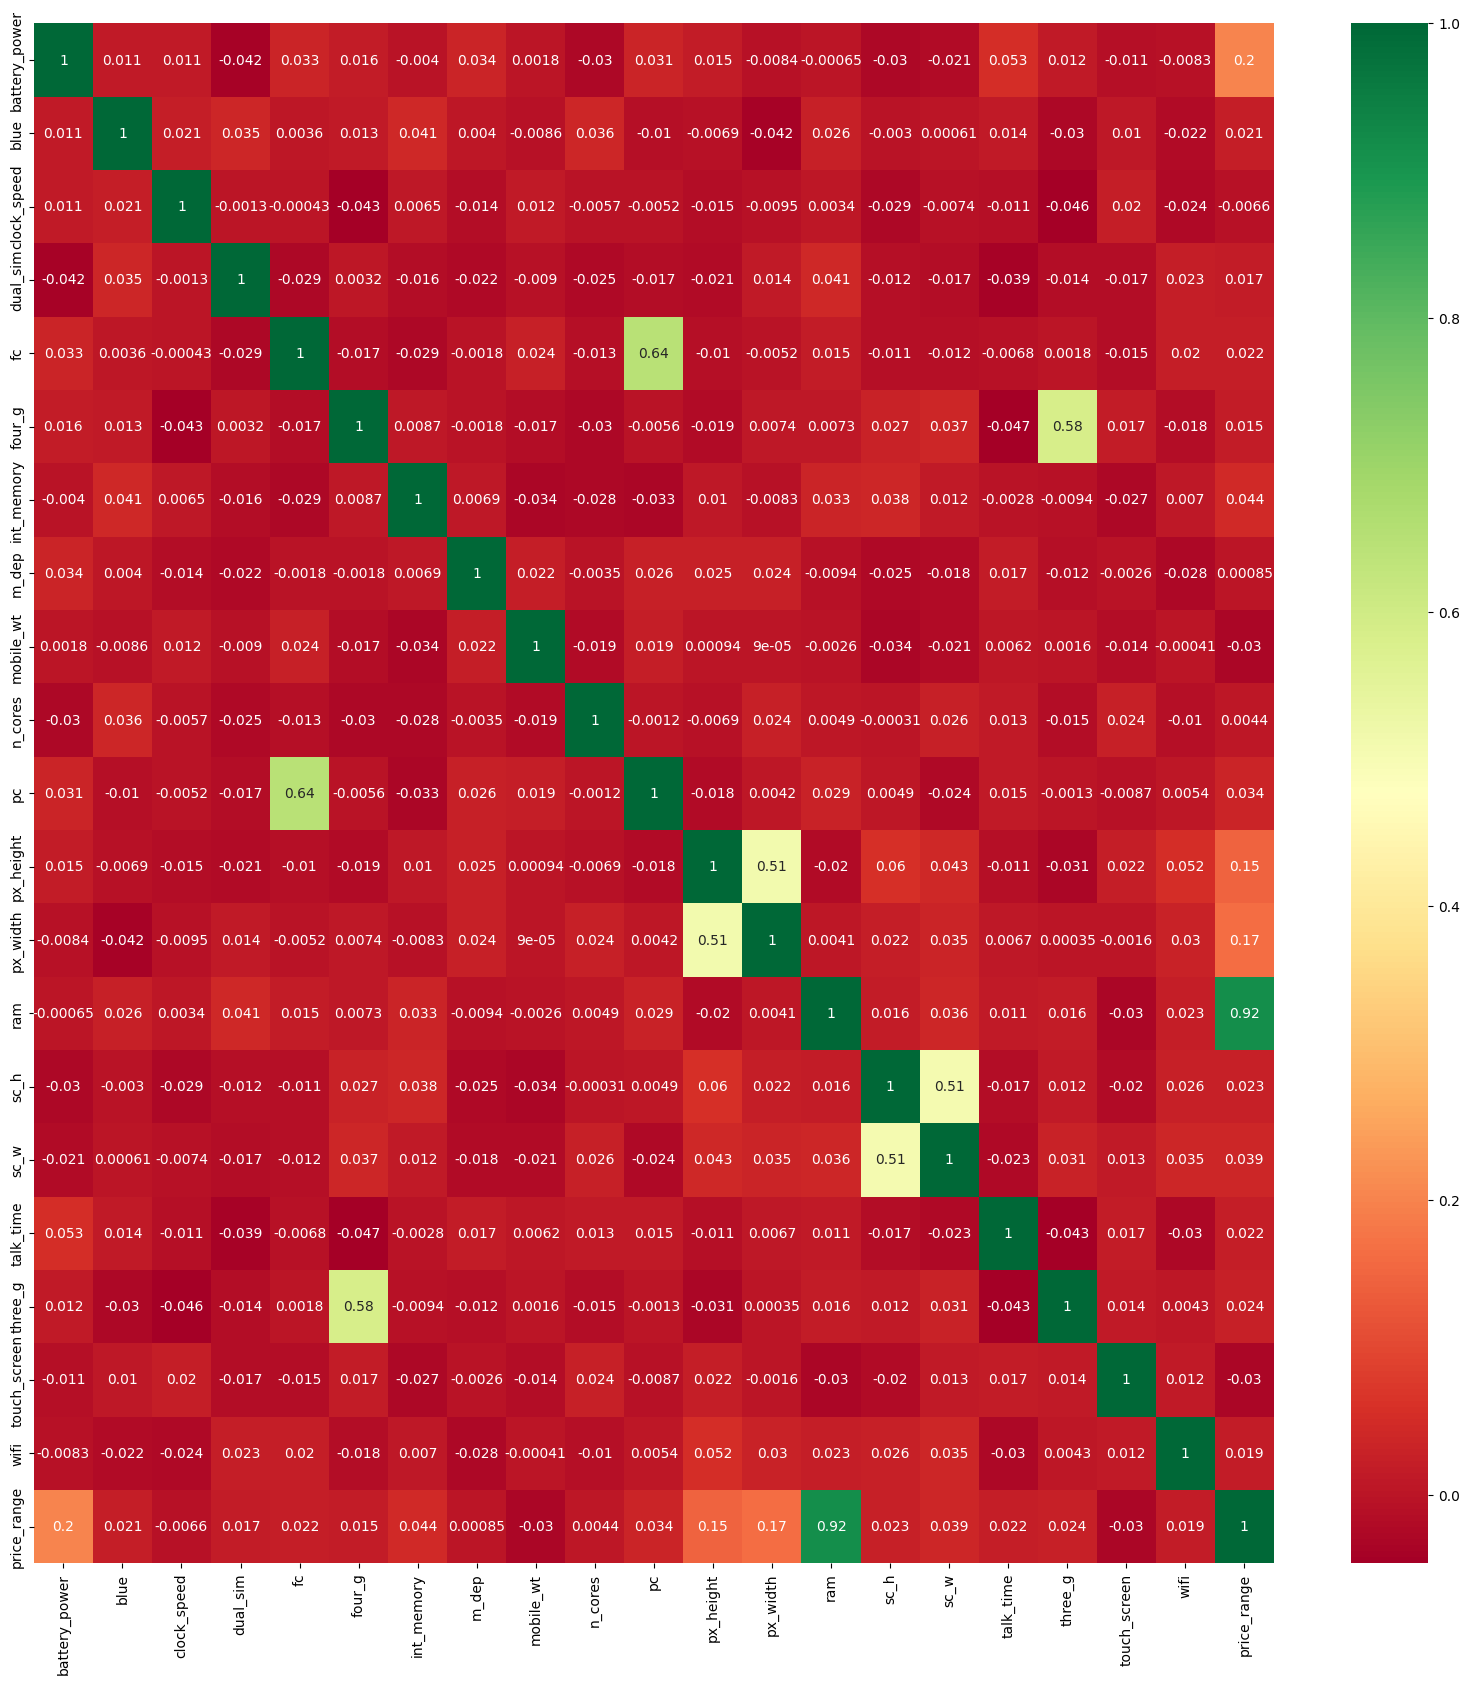

In [6]:
#Create a correlation matrix for the columns in the dataset
correlation_matrix = df.corr()

#plot heat map
plt.figure(figsize=(20,20))
g=sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")

We can loop through all the columns in the correlation_matrix and keep track of the features with a correlation value > 0.5. This 0.5 cut-off is quite strict and chosen for demonstration purposes. A more reasonable value is 80-90%. 

In [7]:
#init an empty set that will contain the names of the correlated features
correlated_features = set()

#loop over lower triangle of pairs of features
#     do not consider the last feature which is the label 
for i in range(len(correlation_matrix .columns) - 1):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            #accumulate the names of the second correlated feature
            colname = correlation_matrix.columns[j]
            correlated_features.add(colname)

In [8]:
#display the correlated features
display(correlated_features)

{'fc', 'four_g', 'px_height', 'sc_h'}

These features are correlated to at least one other feature and can be considered redundant. Let's not include them in our parsimonious set and see how it effects model performance.

In [9]:
#add label to the correlated features which we will drop
correlated_features.add('price_range')
selfeat = df.columns.drop(correlated_features)
compare_models(df, selfeat)

'Prodigious Model Score: 0.91'

'Parsimonious Model Score: 0.90'

>In this case the parsimonious model scores (goodness of fit) lower than the full model.

## Wrapper methods 

These techniques are expensive, but they allow you to try out subsets of features, which means you won’t accidentally prune away features that are uninformative by themselves but useful when taken in combination. The wrapper method treats the model as a black box that provides a quality score of a proposed subset for features. There is a separate method that iteratively refines the subset.

>**Recursive feature elimination (RFE)** is a stepwise feature selection process implemented in sklearn. Recall, the model used for feature selection does not have to be the same as the predictive model. Here we will use a tree based model for RFE.

In [10]:
# get predictors and labels
X = df.drop('price_range', axis=1)  
y = df['price_range']

# use tree based model for RFE
rfe = RFECV(estimator=DecisionTreeClassifier())

# fit RFE
rfe.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
    display('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

'Column: 0, Selected True, Rank: 1.000'

'Column: 1, Selected False, Rank: 14.000'

'Column: 2, Selected False, Rank: 7.000'

'Column: 3, Selected False, Rank: 11.000'

'Column: 4, Selected False, Rank: 12.000'

'Column: 5, Selected False, Rank: 15.000'

'Column: 6, Selected False, Rank: 3.000'

'Column: 7, Selected False, Rank: 10.000'

'Column: 8, Selected False, Rank: 2.000'

'Column: 9, Selected False, Rank: 5.000'

'Column: 10, Selected False, Rank: 9.000'

'Column: 11, Selected True, Rank: 1.000'

'Column: 12, Selected True, Rank: 1.000'

'Column: 13, Selected True, Rank: 1.000'

'Column: 14, Selected False, Rank: 6.000'

'Column: 15, Selected False, Rank: 4.000'

'Column: 16, Selected False, Rank: 8.000'

'Column: 17, Selected False, Rank: 13.000'

'Column: 18, Selected False, Rank: 16.000'

'Column: 19, Selected False, Rank: 17.000'

We can see which features were selected by their column index. They correspond to features 'battery_power', 'px_height', 'px_width', and 'ram' . Let's compare the parsimonious linear model with the full model.

In [11]:
#get the column indecies
selcol = [0, 11, 12, 13]
#get the column names
selfeat = df.columns[selcol]
#compare models
compare_models(df, selfeat)

'Prodigious Model Score: 0.91'

'Parsimonious Model Score: 0.91'


## Embedded methods

These methods perform feature selection as part of the model training process. For example, a decision tree inherently performs feature selection because it selects one feature on which to split the tree at each training step. Another example is the $L_1$ regularizer, which can be added to the training objective of any linear model. 
The $L_1$ regularizer encourages models that use a few features as opposed to a lot of features, so it’s also known as a sparsity constraint on the model. Embedded methods incorporate feature selection as part of the model training process. They are not as powerful as wrapper methods, but they are nowhere near as expensive. Compared to filtering, embedded methods select features that are specific to the model. In this sense, embedded methods strike a balance between computational expense and quality of results.



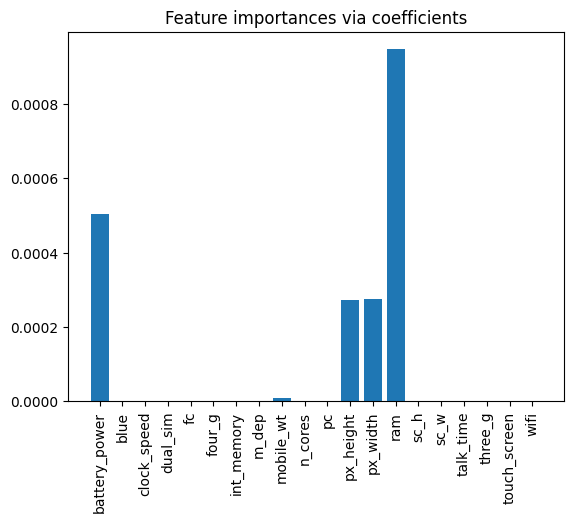

In [12]:
from sklearn.linear_model import LassoCV

# get predictors and labels
X = np.array(df.drop('price_range', axis=1)) 
y = np.array(df['price_range'])

#train lasso (least absolute shrinkage and selection operator) model with 5-fold cross validataion
lasso = LassoCV(cv=5, random_state=0).fit(X, y)

#display the model score
lasso.score(X, y)

#plot feature importance based on coeficients
importance = np.abs(lasso.coef_)
feature_names = np.array(df.columns.drop('price_range'))
plt.bar(height=importance, x=feature_names)
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()

>Again we see battery power, px_height, px_width, and ram are the most important features that influence price.